<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/GloVe_to_embed_Cora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using GloVe to compute Cora's node embedding
In the following tutorial we will compute Cora's node embedding using GloVe, both using the high-level pipeline and the model itself.

We start by installing the GraPE library:

```bash
pip install grape -U
```

We assume you have already properly set up TensorFlow on your machine with it running within a GPU or similar hardware accelerator. If you do not have a similar setup available in your system, the GraPE library will warn you before proceeding further because running these models without a GPU will be significantly slower. You can learn more about properly setupping your TensorFlow on GPU [here](https://www.tensorflow.org/install/gpu).

A valid alternative is to run this tutorial on COLAB.

In [1]:
!pip install -q grape -U

You should consider upgrading via the '/Users/lucacappelletti/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


## Retrieving Cora
We will now proceed to retrieve the Cora graph, using Ensmallen's automatic graph retrieval. You can learn more about the automatic graph retrieval in [add tutorial reference here].

In [2]:
from grape.datasets.linqs import Cora, get_words_data

In [3]:
graph, node_features = get_words_data(Cora())

### Taking a look at the graph report

In [4]:
graph

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>Cora</h2><p class="paragraph">The undirected graph Cora has 2.71K heterogeneous nodes and 5.28K edges. The graph contains 78 connected components, with the largest one containing 2.48K nodes and the smallest one containing 2 nodes. The RAM requirements for the nodes and edges data structures are 207.68KB and 16.34KB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 168, the mode degree is 2, the mean degree is 3.90 and the node degree median is 3.</p><p class="paragraph">The nodes with the highest degree centrality are 35 (degree 168 and node type Genetic_Algorithms), 6213 (degree 78 and node type Reinforcement_Learning), 1365 (degree 74 and node type Neural_Networks), 3229 (degree 65 and node type Neural_Networks) and 910 (degree 44 and node type Neural_Networks).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 7 node types, which are Neural_Networks (818 nodes, 30.21%), Probabilistic_Methods (426 nodes, 15.73%), Genetic_Algorithms (418 nodes, 15.44%), Theory (351 nodes, 12.96%), Case_Based (298 nodes, 11.00%), Reinforcement_Learning (217 nodes, 8.01%) and Rule_Learning (180 nodes, 6.65%). The RAM requirement for the node types data structure is 141.72KB.</p><h3 style="margin: 1em 0 0 0;">Topological Oddities</h3><p class="paragraph">A topological oddity is a set of nodes in the graph that <i>may be derived</i> by an error during the generation of the edge list of the graph and, depending on the task, could bias the results of topology-based models. In the following paragraph, we will describe the detected topological oddities.</p><h4 style="margin: 1em 0 0 0;">Node tuples</h4><p class="paragraph">A node tuple is a connected component composed of two nodes. We have detected 57 node tuples in the graph, involving a total of 114 nodes (4.21%) and 57 edges (0.54%). The detected node tuples are:</p><ul class="medium-columns"><li><p class="paragraph">Node tuple containing the nodes 1105622 (node type Neural_Networks) and 430574 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 116512 (node type Neural_Networks) and 1107808 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 1107728 (node type Neural_Networks) and 115188 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 1136040 (node type Neural_Networks) and 754594 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 73972 (node type Case_Based) and 50980 (node type Case_Based).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 628458 (node type Neural_Networks) and 628459 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 180301 (node type Probabilistic_Methods) and 1110628 (node type Probabilistic_Methods).</p></li>
<li><p class="paragraph">Node tuple c

### Taking a look at the node features
Even though the SkipGram model does not take in consideration the node features, these values are available for Cora so let's take a look.

In [5]:
node_features

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_1423,word_1424,word_1425,word_1426,word_1427,word_1428,word_1429,word_1430,word_1431,word_1432
1153728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1152858,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1114502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
362926,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Running GloVe from the default pipeline

### First-order random walk based sampling

In [9]:
from grape.embedders import GloVeEnsmallen

model = GloVeEnsmallen()
first_embedding = model.fit_transform(graph).get_node_embedding_from_index(0)

Let's take a look at the obtained node embedding:

In [10]:
first_embedding

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
31336,-1.499035,-0.682880,0.928200,0.085815,0.355017,0.222874,2.340120,0.433648,1.240073,0.116815,...,-0.228251,-1.597401,2.705454,1.508699,1.134748,-1.181925,-1.814313,-0.165952,0.894298,-1.432027
1061127,-0.360886,0.581258,-0.232105,0.729803,0.108074,-1.542077,-0.561873,-0.184781,-0.252628,0.095807,...,0.117811,-0.159711,0.396328,-0.883859,0.200757,0.408210,0.470579,-0.069432,-0.067741,-0.937519
1106406,-0.541712,0.565067,0.453093,1.878317,0.806825,-1.268241,1.547540,-0.189935,-0.716481,1.386706,...,2.263327,-0.473051,1.125378,0.334879,-0.396892,-0.662888,-1.410214,0.574921,0.124440,-1.473532
13195,0.402332,-0.085054,-0.160636,2.053095,-0.718849,0.513723,0.570540,-0.076314,0.080241,-0.039955,...,1.157671,0.077495,2.116103,0.075958,0.629484,-0.195664,-2.519720,-1.050055,-1.241850,-0.338872
37879,-0.653536,-0.932969,-0.601371,0.299472,-0.104153,0.800999,0.158082,1.004912,0.170334,-0.920682,...,0.961329,-0.389077,1.456088,0.718449,-1.126317,0.457681,0.052552,0.564845,-0.190841,-1.368024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0.929252,-0.356247,-0.312222,1.010329,1.626150,-0.816579,0.313841,2.041552,-0.932659,0.306346,...,-0.041947,0.181826,1.141090,-0.093304,1.535599,-0.162116,0.927539,-2.075228,1.283354,0.116285
1128977,1.407946,-0.015568,0.411478,-0.659555,-0.175516,0.169527,0.143078,1.074670,-0.069830,1.114775,...,-1.238256,0.020695,1.546427,0.896228,-0.763818,0.633998,-0.337191,0.045252,-1.049150,-0.977593
1128978,-0.370921,1.621469,0.757614,0.019030,1.494028,-0.501466,1.714851,2.620860,-0.640007,0.631631,...,-0.031318,-1.578617,0.897961,0.615910,0.599422,-0.100558,-0.749139,0.686953,-0.501665,-0.805218
117328,0.513574,-0.007287,-1.038124,-1.632397,-0.937778,1.521778,-0.493804,0.686899,-1.915559,-1.819076,...,0.368736,0.384043,-0.262261,1.107145,0.959486,0.656129,-0.117938,0.288697,0.241822,-1.760324


### Second-order random walk based sampling
In some cases, one may want to use the Node2Vec sampling, which is a second-order random walk based sampling.

In [11]:
from grape.embedders import GloVeEnsmallen

model = GloVeEnsmallen(
    return_weight=2.0,
    explore_weight=0.1
)
second_embedding = model.fit_transform(graph).get_node_embedding_from_index(0)

Let's take a look at this new embedding

In [12]:
second_embedding

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
31336,-1.572540,-0.687317,1.081311,0.336327,0.545060,0.461099,2.025269,0.421889,1.400130,0.333699,...,-0.225213,-1.387177,2.436148,1.393045,1.079962,-0.769291,-1.976102,-0.353970,0.897502,-1.059015
1061127,0.104578,0.917908,0.161483,0.917073,-0.129579,-1.516208,-0.941640,-0.201578,-0.521951,0.273845,...,-0.131261,0.269750,-0.005237,-0.755579,-0.341267,0.719736,1.196859,0.243548,0.282810,-0.616100
1106406,-0.252249,1.360960,0.774863,1.569420,0.735693,-1.271114,1.230970,-0.604842,-0.389687,1.317763,...,2.461877,-0.737416,0.681092,0.503393,-0.025401,-0.853309,-0.961904,1.097579,0.023404,-1.067248
13195,0.752026,0.338015,0.415578,1.158743,-0.814718,0.492535,-0.272629,0.513450,0.183781,-0.396678,...,0.184680,0.407320,0.655727,0.208582,0.221509,0.162087,-1.250254,-0.601431,-1.050500,-0.077105
37879,-0.693602,-0.823502,-0.169188,0.011279,0.335252,0.819603,0.159492,1.147941,0.245335,-0.738955,...,0.964989,-0.049394,0.854110,0.424450,-0.931810,0.740366,0.056745,0.683012,-0.468188,-1.319935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0.792650,-0.246109,0.153062,-0.142566,1.060457,0.298891,-0.243896,1.252382,-1.193869,-0.439098,...,-0.575525,-0.008206,0.936720,-0.463722,0.788878,-0.380407,0.771526,-1.793375,1.108869,0.584194
1128977,1.656380,0.293942,0.873186,-1.424065,-0.089148,0.759863,-0.032307,0.514342,0.243669,1.182652,...,-1.129231,-0.236085,0.823951,0.819155,-1.012538,0.956837,0.628818,0.253972,-1.030848,-1.631523
1128978,-0.016542,1.124907,0.868308,-0.227643,0.640654,-0.421442,1.008492,1.388228,-0.893284,-0.740851,...,0.276436,-1.145799,0.525361,0.752529,0.443714,-0.180924,-0.419103,1.164113,0.107543,-0.950796
117328,0.745200,0.515532,-1.137232,-1.429382,-0.340154,2.656469,-1.036059,0.818765,-2.070704,-2.095778,...,0.834551,0.794962,-0.188679,0.925302,0.424913,1.003053,-0.065047,0.880219,-0.154082,-1.318260


## Graph visualization
Let's now visualize the two node embeddings. We can use the graph visualization tool available from the Embiggen module.

In [13]:
from grape import GraphVisualizer

We create the visualizer object.

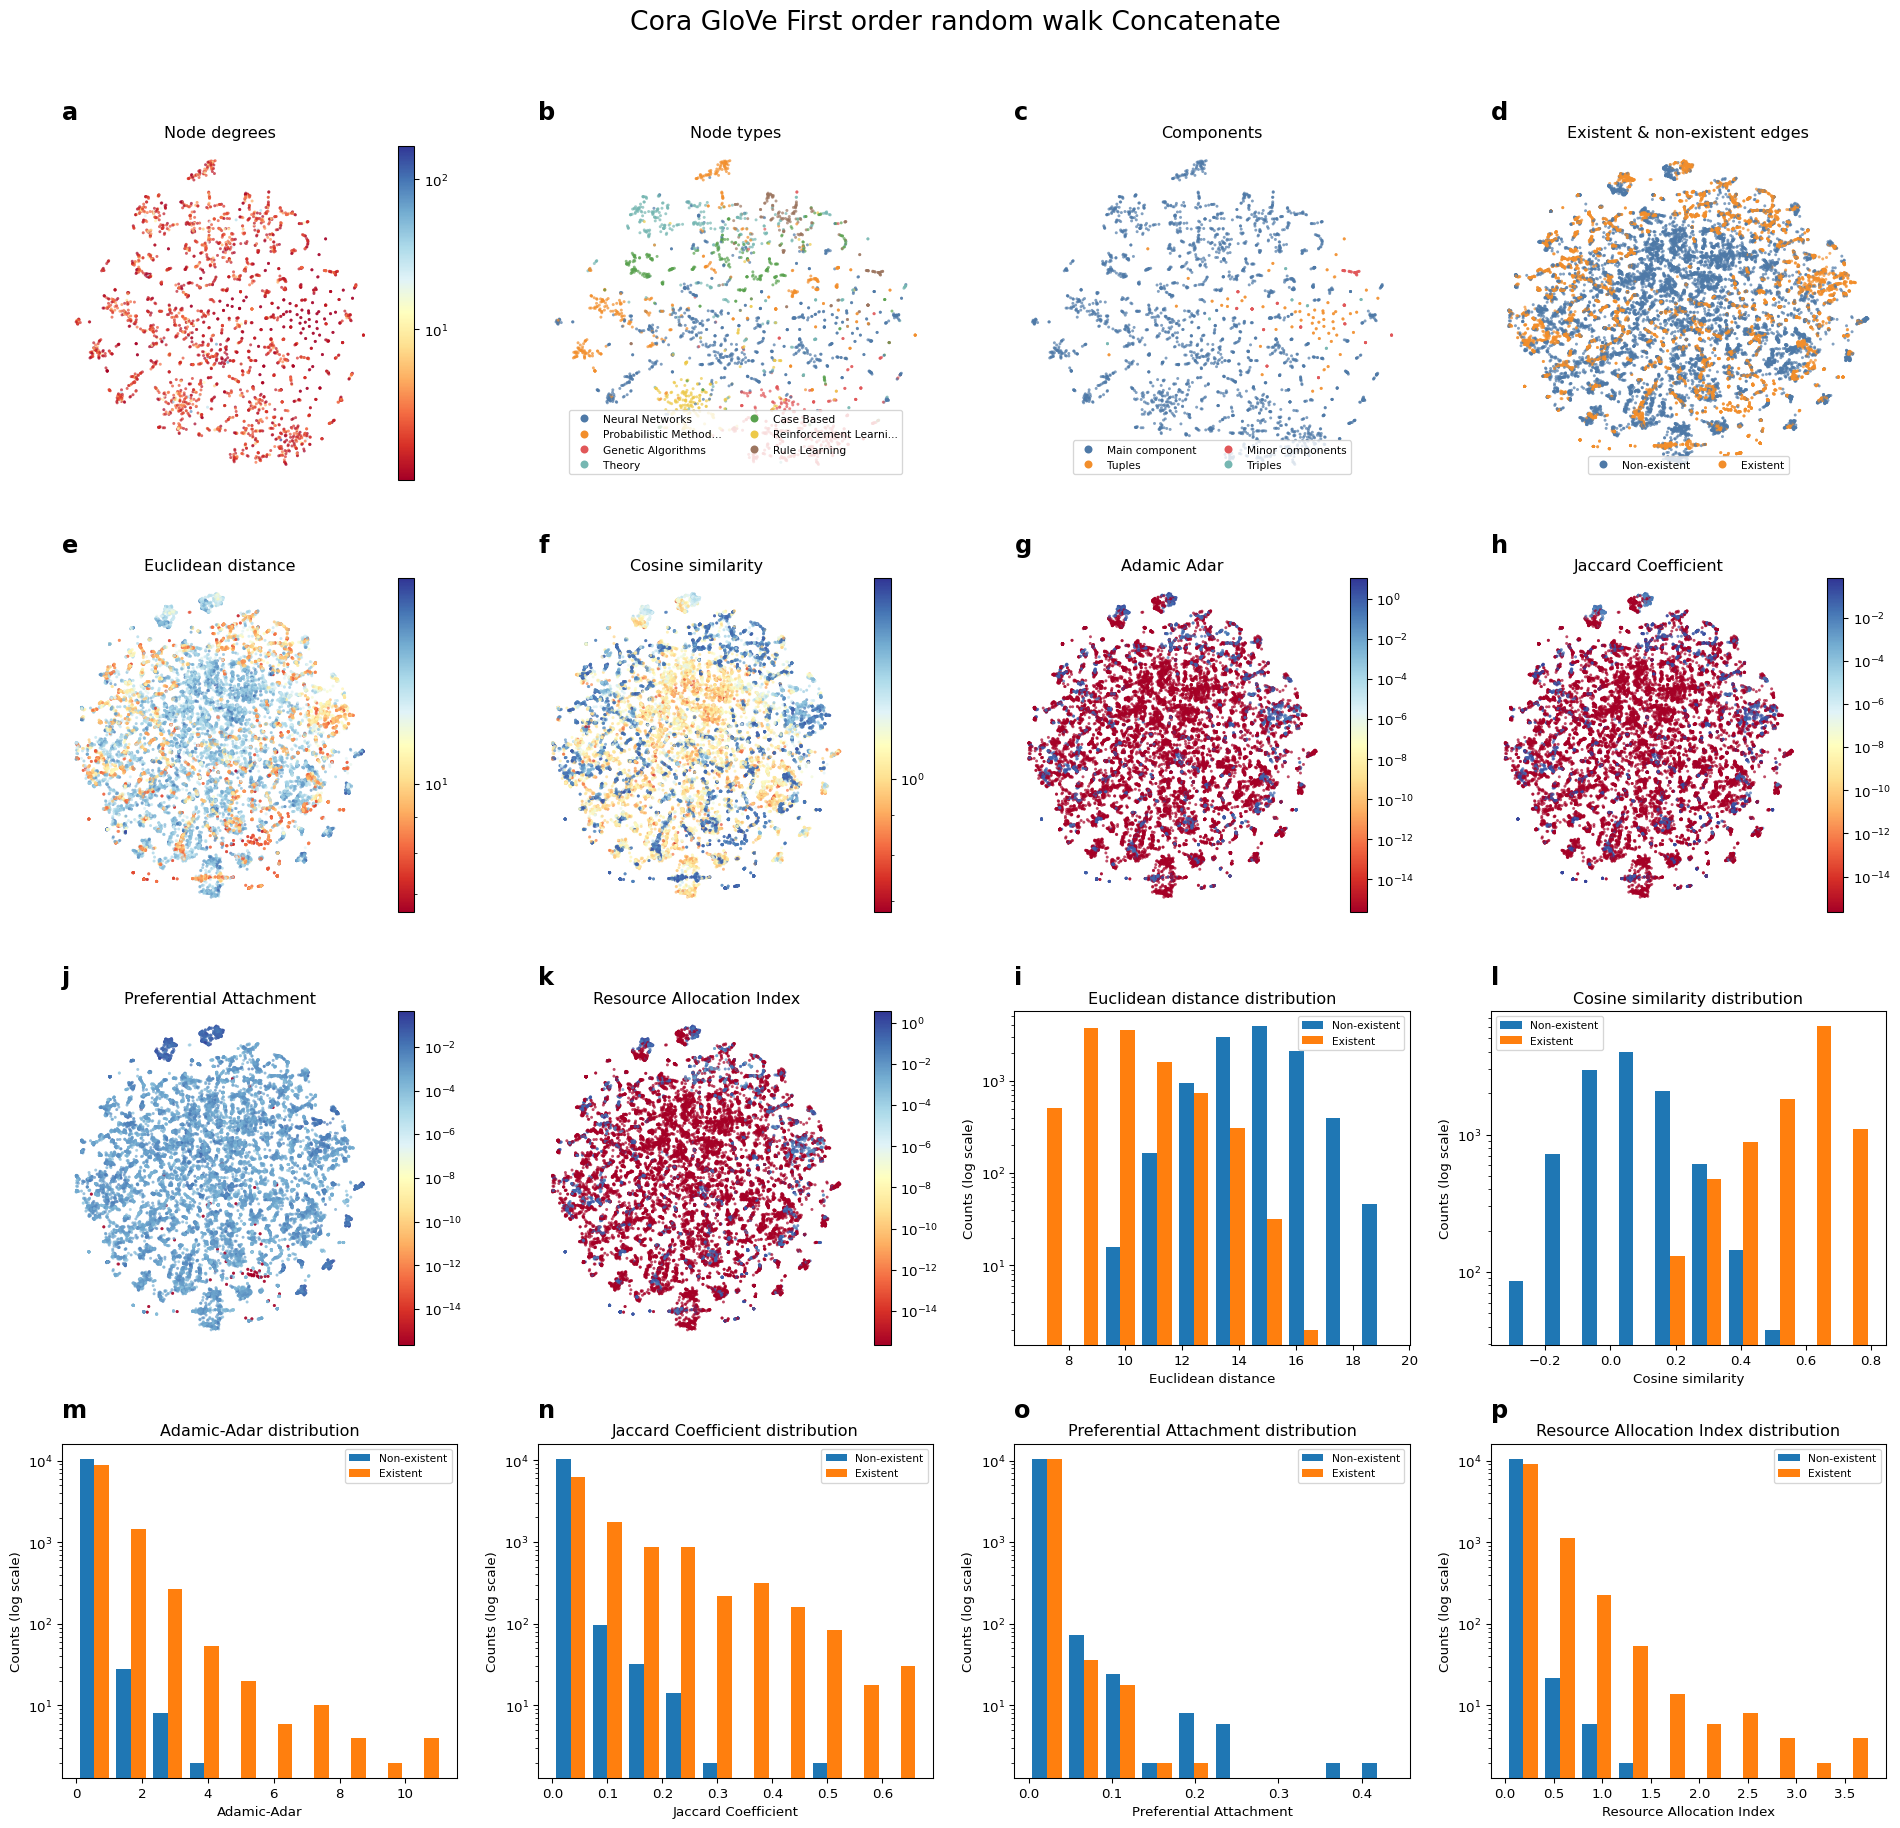

In [14]:
GraphVisualizer(
    graph,
    node_embedding_method_name="GloVe - First order random walk",
    decomposition_kwargs=dict(metric="cosine")
).fit_and_plot_all(first_embedding)

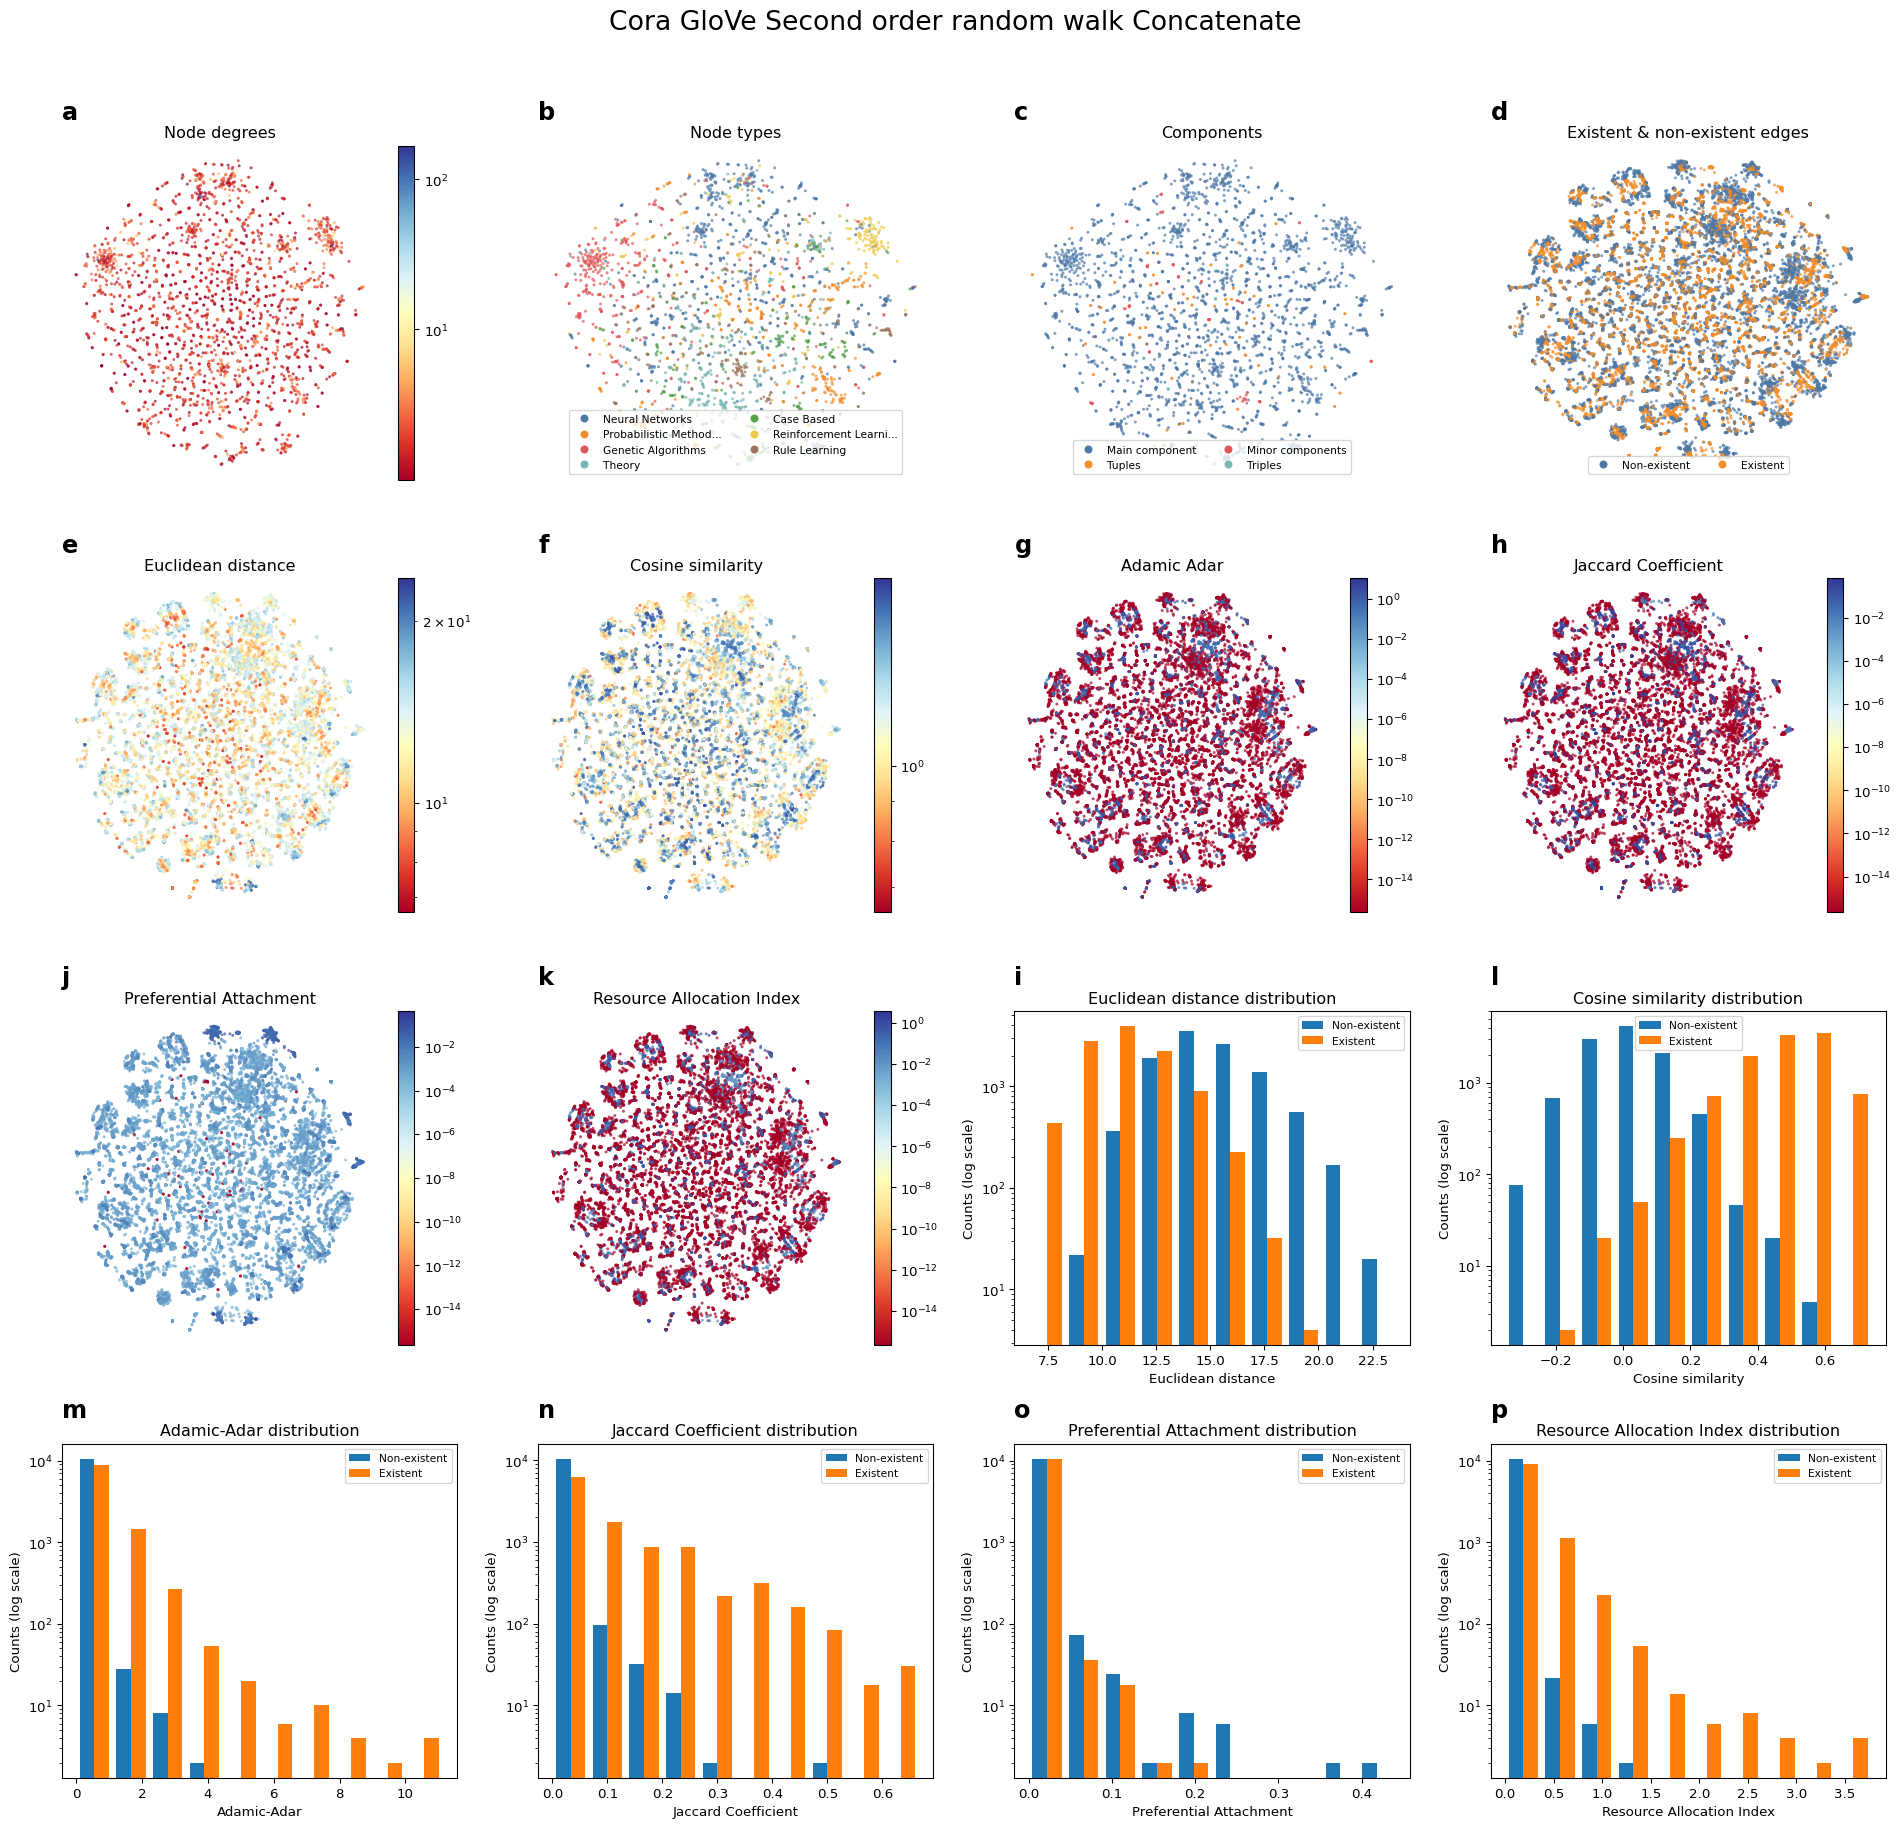

In [15]:
GraphVisualizer(
    graph,
    node_embedding_method_name="GloVe - Second order random walk",
    decomposition_kwargs=dict(metric="cosine")
).fit_and_plot_all(second_embedding)